# Import Libraries and Read dataset

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx
import nltk

In [344]:
df = pd.read_csv("emotion_dataset_2.csv")

# Look at data

In [345]:
df.head(30)

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
5,5,fear,I'm expecting an extremely important phonecall...,Im expecting extremely important phonecall min...
6,6,sadness,.Couldnt wait to see them live. If missing th...,Couldnt wait live missing NH7 wasnt painful en...
7,7,surprise,maken Tip 2: Stop op een moment dat je het hel...,maken Tip 2: Stop op een moment dat je het hel...
8,8,surprise,En dan krijg je ff een cadeautje van een tweep...,En dan krijg je ff een cadeautje van een tweep...
9,9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,Drummer Boy bij op verzoek van : welke ...


In [346]:
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [347]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

d:\Waterloo Assignments\SE101\Chairapy\chairapy_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotion', ylabel='count'>

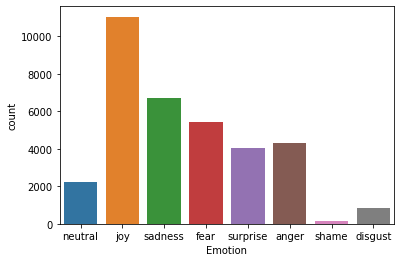

In [348]:
sns.countplot(df["Emotion"])

In [349]:
df = df.loc[ (df['Emotion'] == 'sadness') | (df['Emotion'] =='fear') | (df['Emotion'] == 'anger')| (df['Emotion'] == 'joy')]
df['Emotion'].value_counts()

joy        11045
sadness     6722
fear        5410
anger       4297
Name: Emotion, dtype: int64

# Clean Text

In [350]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [351]:
import string
df['Cleaned_text'] = df['Text'].apply(lambda s:s.lower())
df['Cleaned_text'] = df['Cleaned_text'].apply(lambda s:"".join([char for char in s if char not in string.punctuation]))
df['Cleaned_text'] = df['Cleaned_text'].apply(nfx.remove_userhandles)
df['Cleaned_text'] = df['Cleaned_text'].apply(nfx.remove_stopwords)

df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Cleaned_text
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,sage act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,way homegirl baby funeral man hate funerals sh...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,eye true hazel eyeand brilliant regular featur...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,iluvmiasantos ugh babe hugggzzz u babe naamaze...
5,5,fear,I'm expecting an extremely important phonecall...,Im expecting extremely important phonecall min...,im expecting extremely important phonecall min...


In [352]:
df[['Text', 'Cleaned_text']]

,Text,Cleaned_text
1,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral man hate funerals sh...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant regular featur...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,iluvmiasantos ugh babe hugggzzz u babe naamaze...
5,I'm expecting an extremely important phonecall...,im expecting extremely important phonecall min...
...,...,...
34786,Tuesday woken up to Oscar and Cornet practice X,tuesday woken oscar cornet practice x
34788,The world didnt give it to me..so the world MO...,world didnt meso world definitely cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",youu jealousy losing


# Prepare Data

In [353]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [354]:
X = df['Cleaned_text']
y = df['Emotion']


In [355]:
#Turn words into vectors

cv = CountVectorizer(decode_error = 'replace', binary = True)
X = cv.fit_transform(X)

In [356]:
cv.get_feature_names()

d:\Waterloo Assignments\SE101\Chairapy\chairapy_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '0330',
 '05thuglife',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '0945',
 '099b8',
 '0l',
 '0o',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000th',
 '100prayingwomen',
 '100s',
 '100th',
 '100xawhy',
 '101',
 '1010',
 '1011',
 '1015',
 '1017',
 '101quot',
 '102',
 '1020',
 '1022',
 '102911',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '1031',
 '1035',
 '10373629',
 '1039',
 '104',
 '1040',
 '105',
 '106',
 '10am',
 '10ans',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1104',
 '110kmh',
 '111',
 '1111',
 '11110',
 '112',
 '1129',
 '1130',
 '114',
 '1143yeah',
 '1146',
 '115',
 '1162',
 '1185',
 '11920',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '1201',
 '121',
 '1216',
 '1217',
 '12181',
 '122',
 '1220',
 '122511',
 '123',
 '1230',
 '1230am',
 '1245',
 '125',
 '1250',
 '12521260',
 '128',
 '1281

In [357]:
#X.toarray()

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# Train Model

In [361]:
logistic_model = LogisticRegression(class_weight = 'balanced' )
logistic_model.fit(X_train, y_train)
print(logistic_model.score(X_test,y_test))
s = ["please work"]
vect = cv.transform(s).toarray()
logistic_model.predict(vect)

print(confusion_matrix(logistic_model.predict(X_test), y_test))

0.7095541401273885
[[ 564   85  123  154]
 [  39  757  104  101]
 [ 124  121 1705  259]
 [ 118  106  262  873]]


d:\Waterloo Assignments\SE101\Chairapy\chairapy_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [360]:
s = input("Say something:")
s = s.lower()
s ="".join([char for char in s if char not in string.punctuation])
s = nfx.remove_stopwords(s)
s=nfx.remove_userhandles(s)
s_list = [s]
print(logistic_model.predict(cv.transform(s_list).toarray()))


['sadness']
